In [62]:
import collections
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
data = open('../dimsum-data-1.5/dimsum16.train', 'r').readlines()
data_test = open('../dimsum-data-1.5/dimsum16.test.blind', 'r', encoding='utf-8').readlines()

In [64]:
def extract_data(data_in):
	X, y = [], []
	for i, line in enumerate(data_in):
		if line != '\n':
			num, word, lem, pos, mwe, _, _, supersenses, _ = line[:-1].split('\t')
			X.append([int(num), word, lem, pos])
			y.append(supersenses)
		else :
			X.append("")
			y.append("")
	return X, y

In [65]:
def write_data(X_test, y_test, filename):
	#xi_test format: num, word, lem, POS
	with open(filename, 'w', encoding='utf-8') as f:
		is_first = True
		for xi_test, yi_test in zip(X_test, y_test):
			if (not is_first) and xi_test[0] == 1:
				f.write('\n')
			f.write(f'{xi_test[0]}\t{xi_test[1]}\t-\t{xi_test[3]}\tO\t0\t\t{yi_test}\n')
			is_first = False
		f.write('\n')

In [66]:
def train_test_split_sentences(X,y,test_size=0.3, random_state=0, shuffle=True) :
	X_by_sentences = []
	y_by_sentences = []
	sentence = []
	sentence_tags = []
	for line, tag in zip(X,y) :
		if line == "" :
			X_by_sentences.append(sentence)
			y_by_sentences.append(sentence_tags)
			sentence = []
			sentence_tags = []
		else :
			sentence.append(line)
			sentence_tags.append(tag)

	X, X_val, y, y_val = train_test_split(X_by_sentences, y_by_sentences, test_size=test_size, random_state=random_state, shuffle=shuffle)

	X = [y for x in X for y in x]
	X_val = [y for x in X_val for y in x]
	y = [y_1 for x in y for y_1 in x]
	y_val = [y for x in y_val for y in x]

	return X, X_val, y, y_val

In [67]:
X, y = extract_data(data)
X, X_val, y, y_val = train_test_split_sentences(X, y)
write_data(X_val, y_val, 'val.gold')

In [68]:
def count_ss(y_in,plot = True):
	verbal_ss = [x for x in list(filter(None, y_in)) if x.startswith("v.")]
	nominal_ss = [x for x in list(filter(None, y_in)) if x.startswith("n.")]

	counter_vss = collections.Counter(verbal_ss)
	counter_nss = collections.Counter(nominal_ss)
	most_common_vss = counter_vss.most_common(1)[0]
	most_common_nss = counter_nss.most_common(1)[0]
	print(most_common_vss)
	print(most_common_nss)
	if plot :
		labels, values = zip(*counter_vss.most_common())
		plt.xticks(rotation='vertical')
		plt.bar(labels, values, 1)
		plt.plot()
		plt.show()

		labels, values = zip(*counter_nss.most_common())
		plt.xticks(rotation='vertical')
		plt.bar(labels, values, 1)
		plt.plot()
		plt.show()
	return most_common_vss, most_common_nss

('v.stative', 2280)
('n.person', 1373)


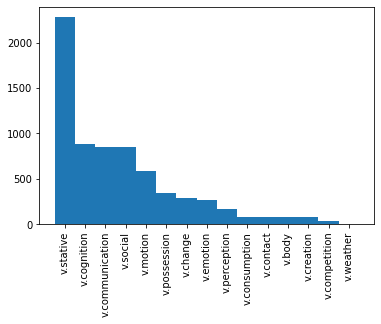

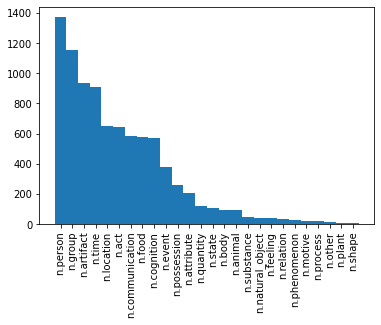

In [69]:
most_common_vss, most_common_nss = count_ss(y)

('v.stative', 1023)
('n.person', 594)


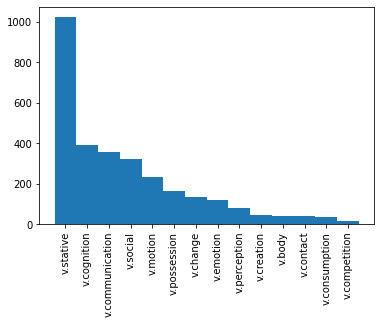

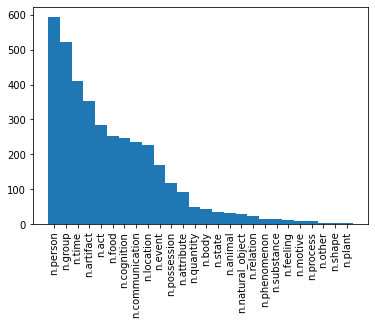

In [70]:
most_common_vss, most_common_nss = count_ss(y_val)

In [71]:
y_pred = []
for x in X_val:
	if x[3] == "NOUN":
		y_pred.append(most_common_nss[0])
	elif x[3] == "VERB":
		y_pred.append(most_common_vss[0])
	else:
		y_pred.append("")

In [72]:
write_data(X_val, y_pred, 'val_maj.pred')

In [73]:
verbal_ss = list(set(x for x in list(filter(None, y)) if x.startswith("v.")))
nominal_ss = list(set(x for x in list(filter(None, y)) if x.startswith("n.")))

In [74]:
random.seed(52)
y_pred_random = []
for x in X_val:
	if x[3] == "NOUN":
		y_pred_random.append(random.choice(nominal_ss))
	elif x[3] == "VERB":
		y_pred_random.append(random.choice(verbal_ss))
	else:
		y_pred_random.append("")

In [75]:
write_data(X_val, y_pred_random, 'val_rand.pred')

Le code pour la moyenne entre scores est très (très (très)) moche et je pairai un jour pour tout le mal qu'il a causé

In [76]:
def mean_score_rand(files):
	l1 = []
	l2 = []
	l3 = []
	for file in files :
		with open(file, 'r', encoding='utf-8') as fin:
			lines = fin.readlines()
			for i in range(4) :
				line = lines[i].rstrip()
				ls = line.split(' ')
				ls = list(filter(None, ls))
				if i == 0:
					l0 = ls
				if i == 1 :
					ls = [s[:-1] for s in ls]
					ls = list(map(float, ls))
				if i > 1 :
					ls = list(map(int, ls))
				if i == 1 :
					l1.append(ls)
				elif i == 2 :
					l2.append(ls)
				elif i == 3 :
					l3.append(ls)

	l1_mean = np.mean( np.array([l for l in l1]), axis=0 )
	l1_var = np.var( np.array([l for l in l1]), axis=0 )

	l2_mean = np.mean( np.array([l for l in l2]), axis=0 )
	l2_var = np.var( np.array([l for l in l2]), axis=0 )

	l3_mean = np.mean( np.array([l for l in l3]), axis=0 )
	l3_var = np.var( np.array([l for l in l3]), axis=0 )

	print(l1_var)
	# print(l2_var)
	# print(l3_var)
	print("   ".join(l0))
	print(f"{l1_mean[0]:.2f}	{l1_mean[1]:.2f}	{l1_mean[2]:.2f}	{l1_mean[3]:.2f}		    {l1_mean[4]:.2f}       {l1_mean[5]:.2f}")
	print(f"{l2_mean[0]:.0f}	{l2_mean[1]:.0f}		{l2_mean[2]:.0f}						{l2_mean[3]:.0f}        {l2_mean[4]:.0f}")
	print(f"{l3_mean[0]:.0f}	{l3_mean[1]:.0f}	{l3_mean[2]:.0f}					{l3_mean[3]:.0f}       {l3_mean[4]:.0f}")

In [77]:
mean_score_rand(["test.score","test_2.score","test_3.score","test_4.score","test_5.score"])

FileNotFoundError: [Errno 2] No such file or directory: 'test_2.score'